nCycles - number of simuation cyces
nBuyers  - number of the buyers

nSellers - number of the sellers

initial buyer $i$ reservation price, different for each buyer: $p_{b,i}=\frac{1} {1 + u_i}$ with $u_i\sim\mathcal{U}(0,0.1)$

initial seller j reservation price, different for each seller: $p_{b,j}=1 + u_j$ with $u_j\sim\mathcal{U}(0,0.1)$

In [1]:
%pylab inline
import statistics as s
import numpy as np
import pylab as plt
from IPython.display import clear_output
from ipykernel.pylab.backend_inline import flush_figures
import time

Populating the interactive namespace from numpy and matplotlib


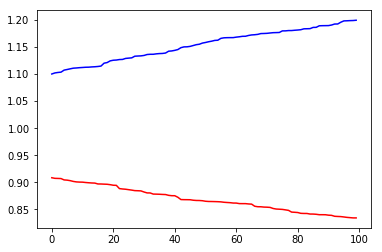

In [8]:
nCycles=100000
nBuyers=100
nSellers=100

buyerPriceList=[]
sellerPriceList=[]

for i in range(nBuyers):
    buyerPriceList.append(1/(1+np.random.uniform(0.1,0.2)))
for j in range(nSellers):
    sellerPriceList.append(1+np.random.uniform(0.1,0.2))
    
plt.plot(np.sort(buyerPriceList)[::-1],"r")
plt.plot(np.sort(sellerPriceList),"b")

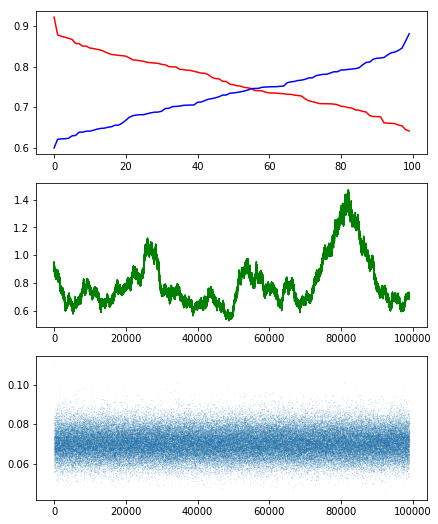

time 100000 n. of exchanges 69
mean and stdev of exchange prices: 0.700, 0.052


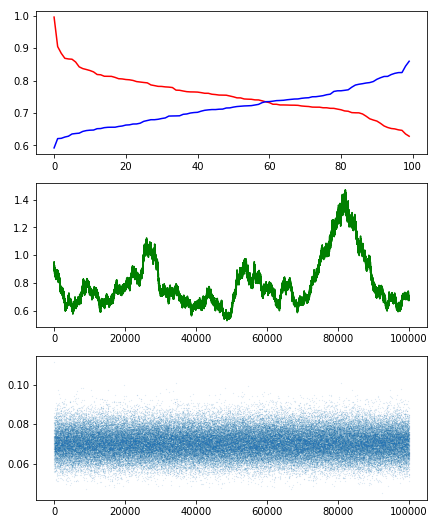

In [9]:
meanPrice_ts=[]
meanPriceStDev_ts=[]
for t in range(1,nCycles+1):    
    dealPrices=[]
    agNum=max(nBuyers,nSellers)
    for n in range(agNum):
        i = np.random.randint(0,nBuyers)
        j = np.random.randint(0,nSellers)
        #print ('%2d %2d %.3f %.3f %.3f'% (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #                          buyerPriceList[i],sellerPriceList[j]))
        if buyerPriceList[i]>=sellerPriceList[j]:
            dealPrices.append(sellerPriceList[j])
            buyerPriceList[i] *=1/(1+np.random.uniform(0,0.1))
            sellerPriceList[j]*=1+np.random.uniform(0,0.1)
        else:
            buyerPriceList[i] *=1+np.random.uniform(0,0.2)
            sellerPriceList[j]*=1/(1+np.random.uniform(0,0.2))

        #print ('%2d %2d %.3f %.3f %.3f \n'% (i,j,buyerPriceList[i]-sellerPriceList[j],\
        #                          buyerPriceList[i],sellerPriceList[j]))
           
    if len(dealPrices) > 2:
        meanPrice_ts.append(s.mean(dealPrices))
        meanPriceStDev_ts.append(s.stdev(dealPrices))
    else:
        meanPrice_ts.append(np.nan)
        meanPriceStDev_ts.append(np.nan)

    if t % 1000==0:
        clear_output()
        flush_figures()
        print('time', t, 'n. of exchanges', len(dealPrices))
        print('mean and stdev of exchange prices: %.3f, %.3f' %\
              (meanPrice_ts[-1],meanPriceStDev_ts[-1]))

        plt.figure(1,figsize=(7,9))
        plt.subplot(311)
        plt.plot(np.sort(buyerPriceList)[::-1],"r")
        plt.plot(np.sort(sellerPriceList),"b")
        plt.subplot(312)
        plt.plot(meanPrice_ts,"g")
        plt.subplot(313)
        coefOfVariation=[]
        for m in range(len(meanPriceStDev_ts)):
            coefOfVariation.append(meanPriceStDev_ts[m]/
                                  meanPrice_ts[m])
        plt.plot(coefOfVariation,".",markersize=0.1)
        #time.sleep(0.1)


mean and stdev of exchange prices: 0.700, 0.052


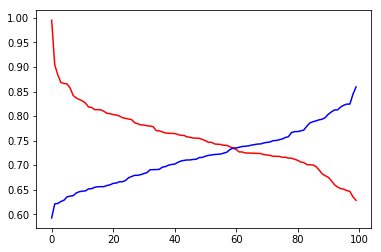

In [10]:
print('mean and stdev of exchange prices: %.3f, %.3f' %\
              (meanPrice_ts[-1],meanPriceStDev_ts[-1]))
plt.plot(np.sort(buyerPriceList)[::-1],"r")
plt.plot(np.sort(sellerPriceList),"b")